# Identifying sources of deviations
- This notebook created Figures 9, 10, and 11 in the paper.
- This notebook shows the comparisions between Birsbane results and their simulation counterparts of the experiment identifying sources of deviations.
- The code for Brisbane results are shown in this notebook.
- The code for the simulation results are shown in the notebook "Identifying sources of deviation_Simulation results".
- The experiment may not reveal the exact sources of deviation, but it helps narrow down the range of possible sources.

# Import

In [1]:
import qiskit
qiskit.__version__

'2.0.0'

In [2]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.circuit.classical import expr
import numpy as np

# 1. Verify the impact of number of qubits on the deviation
- Two circuits are used in this experiment.
- To avoid the impact of $\theta$, the quantums gate used in these two circuits are only Hadamard gates.
- The first circuit has two qubits, each qubit controls an individual ancilla qubit. Two Hadamard gates are applied to each qubit.
- The second circuit has one more qubit, but the structure is the same with the first one.
- Each circuit is examined on both IBM Brisbane and simulation.
## 1.1. Two-qubit circuit
### 1.1.1. Circuit

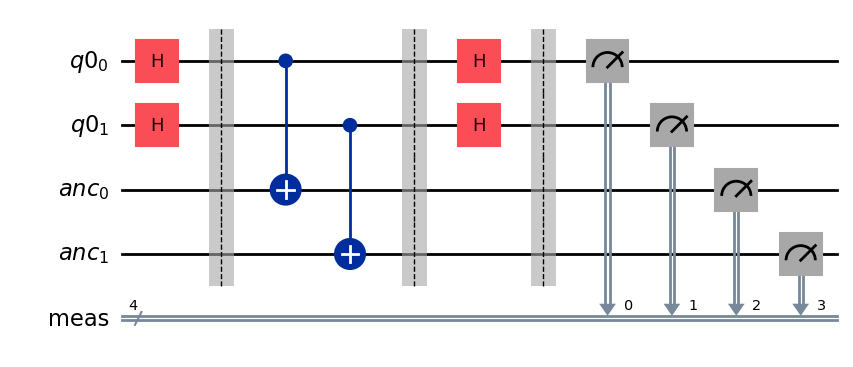

In [3]:
n_test = 2
n_anc = 2

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.h(0)
qct.h(1)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])

qct.barrier()

qct.h(0)
qct.h(1)

qct.measure_all()
qct.draw(output='mpl')

### 1.1.2.  IBM Brisbane's result

In [4]:
import matplotlib.pyplot as plt
from qiskit.visualization import plot_histogram
import pandas as pd
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from qiskit_ibm_runtime import QiskitRuntimeService
from qiskit.compiler import transpile
from qiskit_ibm_runtime import SamplerV2 as Sampler
from qiskit_ibm_runtime import QiskitRuntimeService

In [6]:
service = QiskitRuntimeService()
backend = service.backend(name='ibm_brisbane')

C:\Users\DELL\AppData\Local\Temp\ipykernel_8668\3840619221.py:1: DeprecationWarning: The "ibm_quantum" channel option is deprecated and will be sunset on 1 July. After this date, ibm_cloud will be the only valid channel. For information on migrating to the new IBM Quantum Platform on the "ibm_cloud" channel, review the migration guide https://quantum.cloud.ibm.com/docs/migration-guides/classic-iqp-to-cloud-iqp .
  service = QiskitRuntimeService()


In [7]:
qc_transpiled = transpile(qct, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled], shots=2048*4)

In [12]:
#job_id = ''
service = QiskitRuntimeService()
job = service.job(job_id)
result1 = job.result()

In [13]:
sampler_result = result1[0]
data = sampler_result.data
counts = data.meas.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(counts.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del counts[k]
                break
            j+=1

    for k, v in list(counts.items()):
        counts[k[1:]] = counts.pop(k)

In [14]:
df1 = pd.DataFrame(list(counts.items()), columns=["States", "Counts"])
df1.to_excel("testBrisbane_2q_Hadamard_data.xlsx", index=False)
experiment = pd.read_excel("testBrisbane_2q_Hadamard_data.xlsx", dtype={"States": str})
counts = dict(zip(experiment["States"], experiment["Counts"]))

### 1.1.3. Simulation's result

In [15]:
simulation = pd.read_excel("testsim_2q_Hadamard_data.xlsx", dtype={"States": str})
simu_counts = dict(zip(simulation["States"], simulation["Counts"]))

### 1.1.4. Comparison

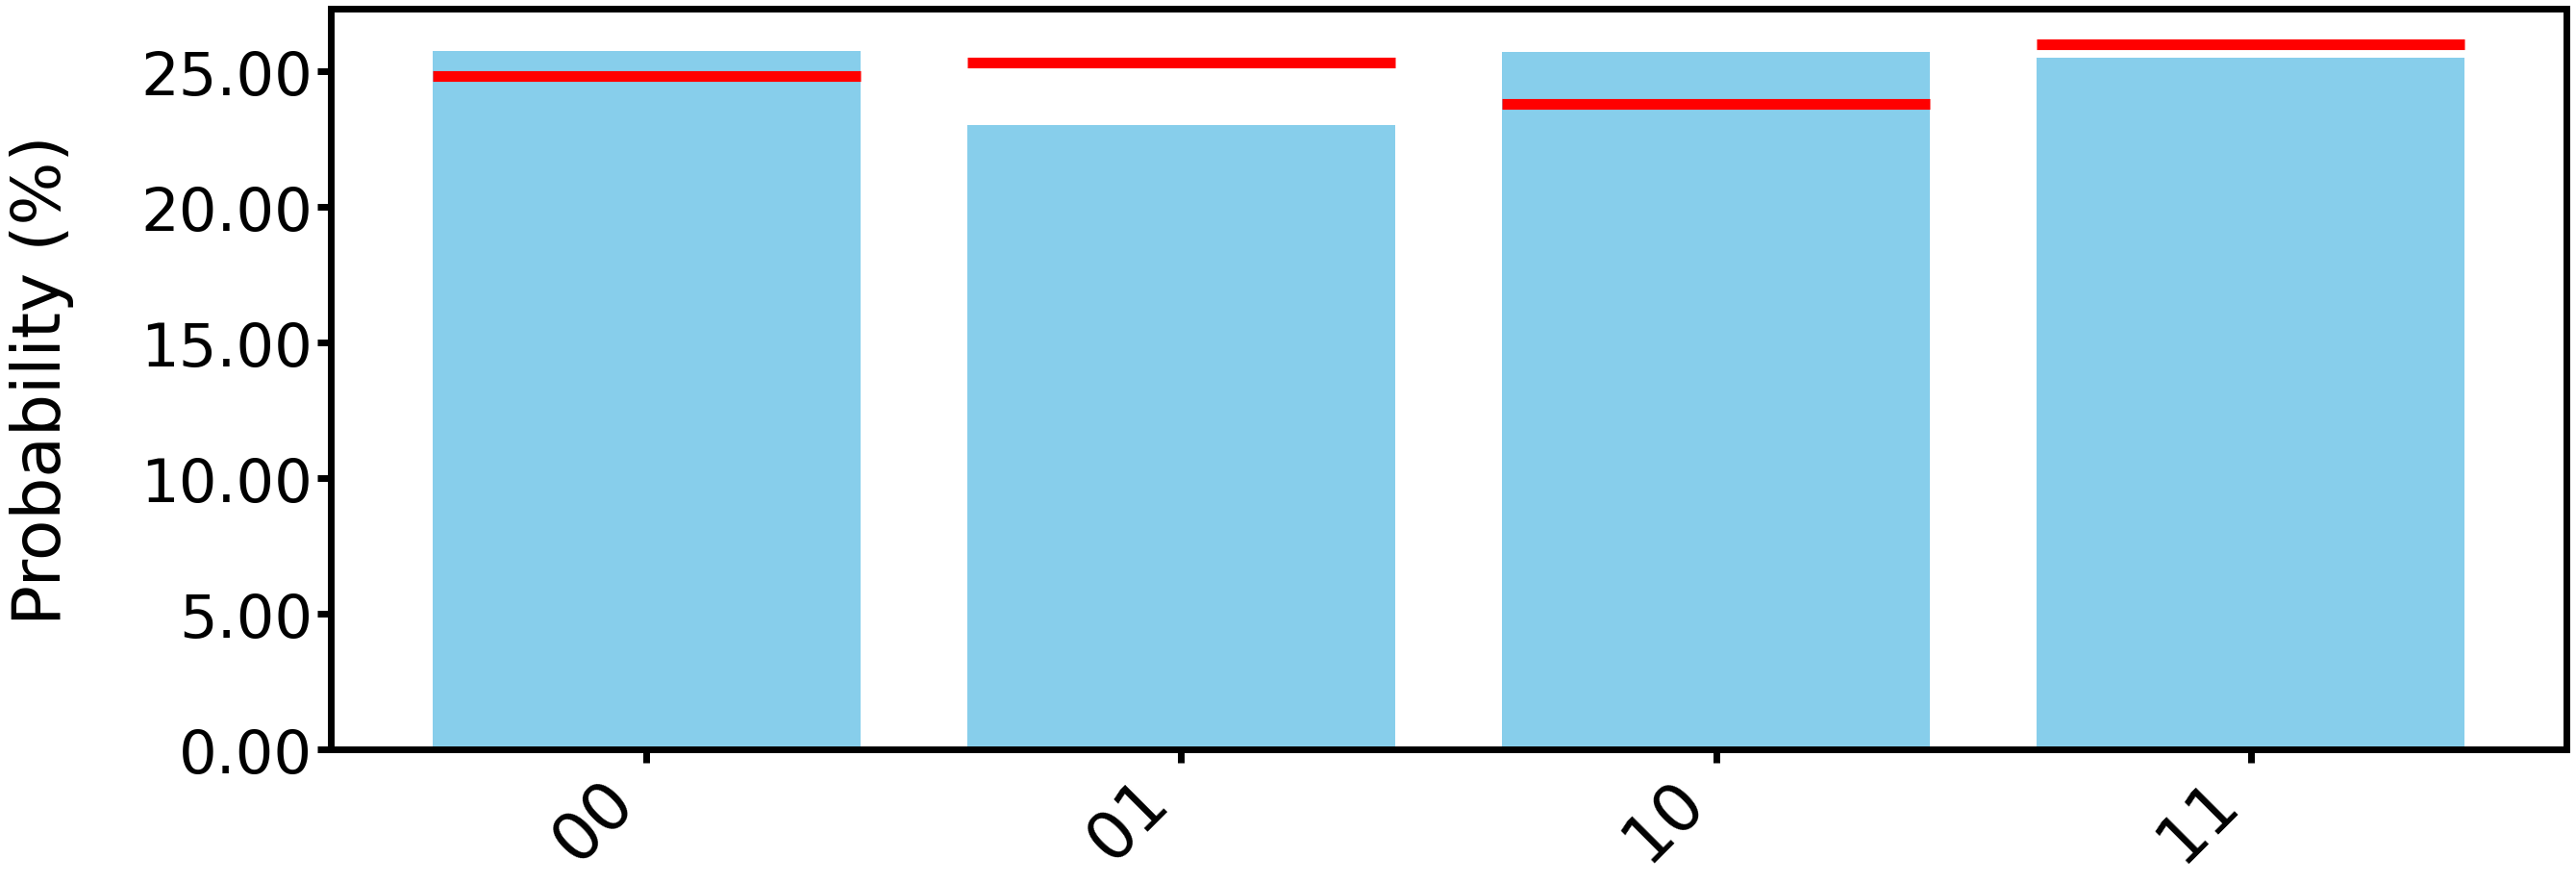

In [17]:
from matplotlib.ticker import FuncFormatter
total_count = sum(counts.values())
total_simu_counts = sum(simu_counts.values())

probabilities = {state: count / total_count for state, count in counts.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(30, 10))
bars = plt.bar(states, prob_values, color='skyblue')

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0005
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=8)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=45)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=50, labelpad=50)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(5)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(5)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(5)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(5)
ax.tick_params(axis='x', length=10, width=5, direction='out')
ax.tick_params(axis='y', length=10, width=5, direction='out')
plt.show()

## 1.2. Three-qubit circuit
### 1.2.1. Circuit

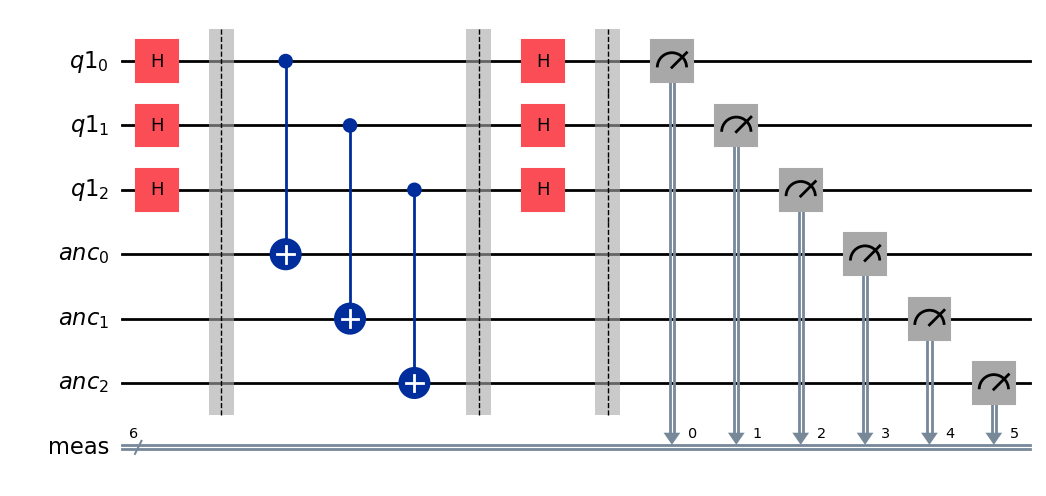

In [18]:
n_test = 3
n_anc = 3

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.h(0)
qct.h(1)
qct.h(2)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])
qct.cx(2,anc[2])


qct.barrier()

qct.h(0)
qct.h(1)
qct.h(2)

qct.measure_all()
qct.draw(output='mpl')

### 1.2.2. Brisbane's result

In [19]:
qc_transpiled = transpile(qct, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled], shots=2048*4)

#job_id = ''
service = QiskitRuntimeService()
job = service.job(job_id)
result2 = job.result()

In [20]:
sampler_result2 = result2[0]
data2 = sampler_result2.data
counts2 = data2.meas.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(counts2.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del counts2[k]
                break
            j+=1

    for k, v in list(counts2.items()):
        counts2[k[1:]] = counts2.pop(k)

In [21]:
df2 = pd.DataFrame(list(counts2.items()), columns=["States", "Counts"])
df2.to_excel("testBrisbane_3q_Hadamard_data.xlsx", index=False)
experiment = pd.read_excel("testBrisbane_3q_Hadamard_data.xlsx", dtype={"States": str})
counts2 = dict(zip(experiment["States"], experiment["Counts"]))

### 1.2.3. Simulation's result

In [22]:
simulation = pd.read_excel("testsim_3q_Hadamard_data.xlsx", dtype={"States": str})
simu_counts2 = dict(zip(simulation["States"], simulation["Counts"]))

### 1.2.4. Comparison

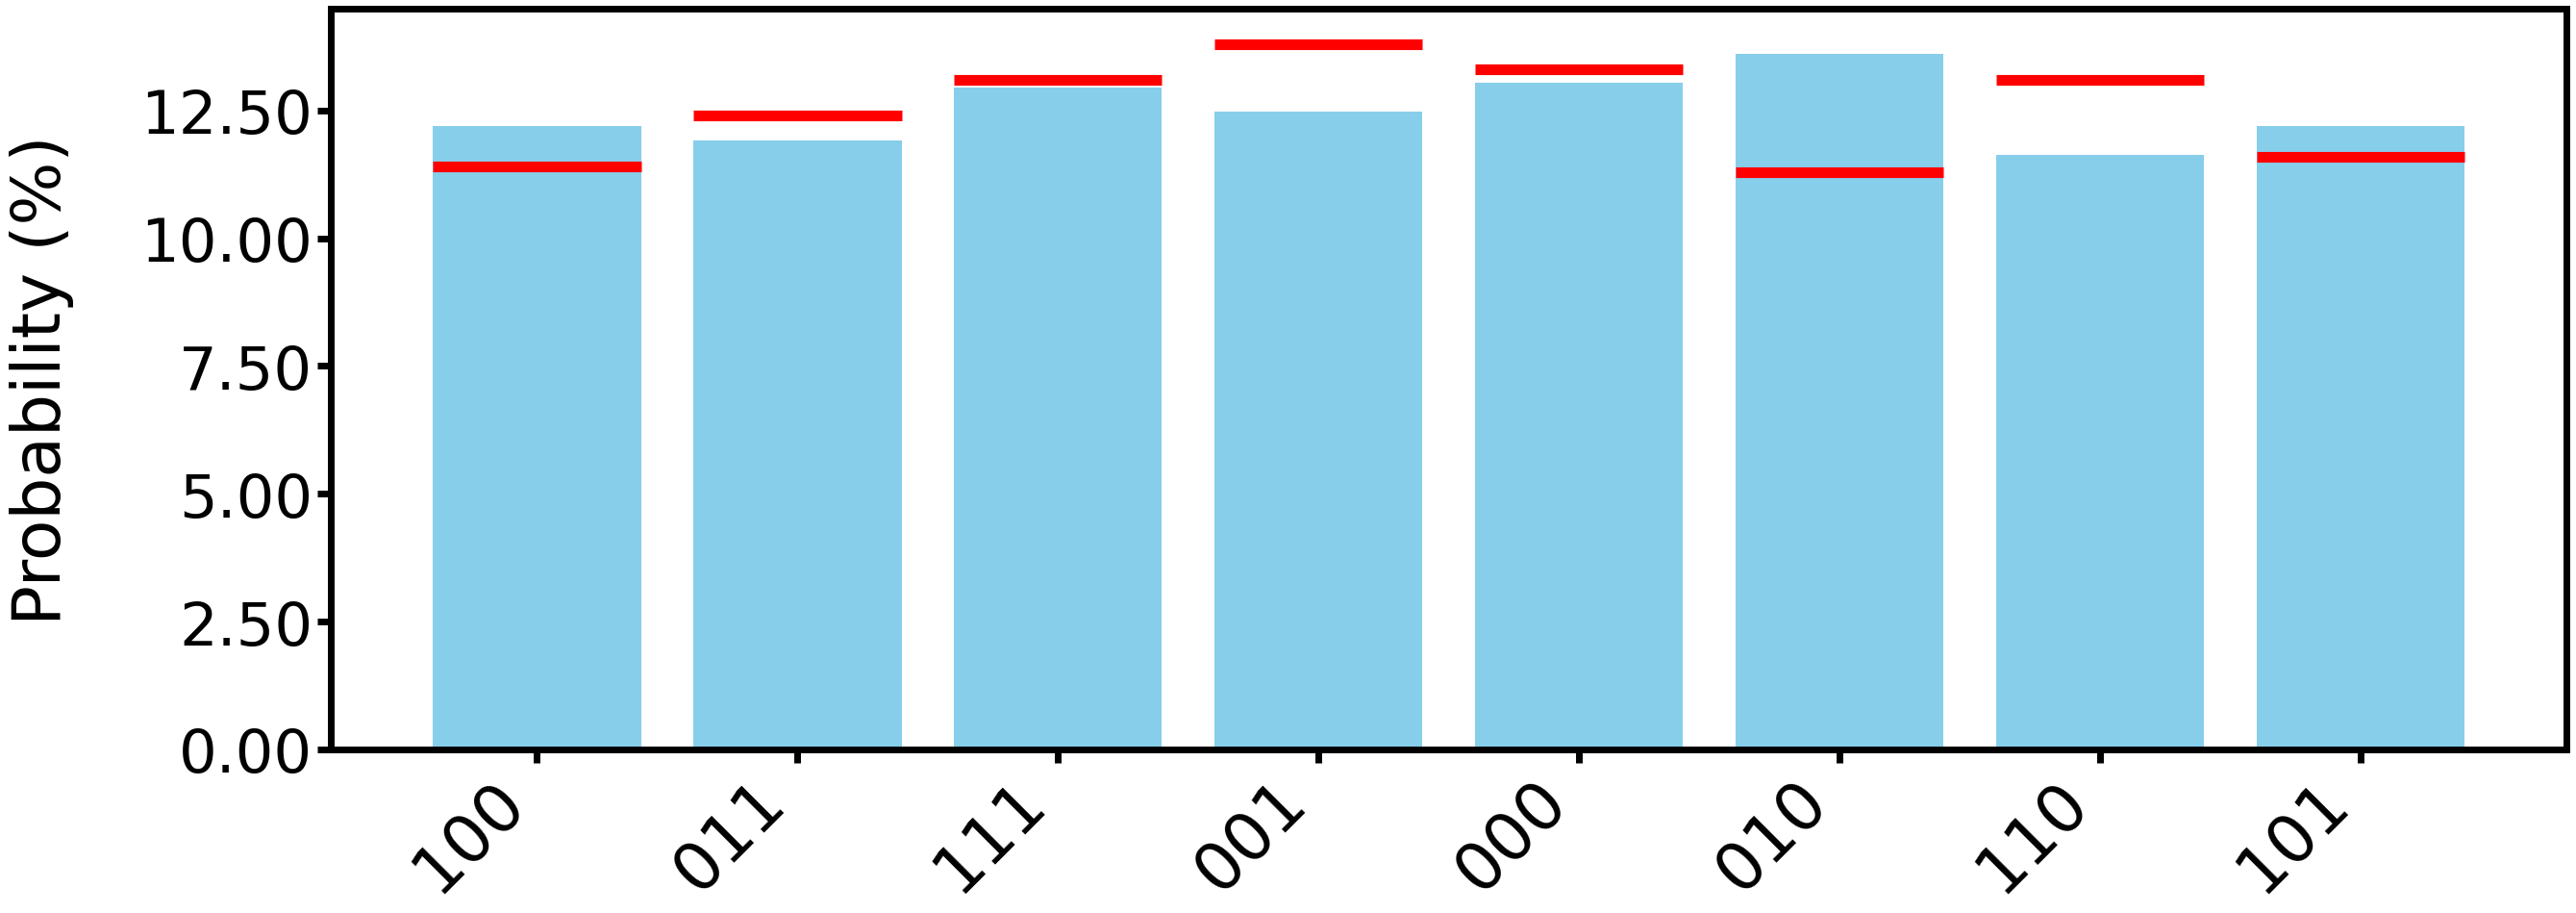

In [23]:
total_count = sum(counts2.values())
total_simu_counts = sum(simu_counts2.values())

probabilities = {state: count / total_count for state, count in counts2.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts2.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(30, 10))
bars = plt.bar(states, prob_values, color='skyblue')

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0005
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=8)


def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=45)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=50, labelpad=50)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(5)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(5)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(5)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(5)
ax.tick_params(axis='x', length=10, width=5, direction='out')
ax.tick_params(axis='y', length=10, width=5, direction='out')
plt.show()

- The comparisons in 1.1.4 and 1.2.4 show that the Brisbane's results and the simulation's results exhibit small deviations. 
- While increasing the number of qubits still raises the deviation, the largest observed difference is still below 3%, and this deviation remains unchanged when increasing the number of qubits.
- Therefore, the number of qubits is not a primary factor contributing considerable deviations.
- Additionally, both the two circuits involed multiple Toffoli gates, each has one control and one target qubit, so it is reasonable to deduce that the number of Toffoli gate is also unlikely to be not a major reason for significant discrepancies.

# 2. Verify the impact of $\theta$ value on the deviations
- Two circuits are used in this part.
- Both circuits now have three qubits.
- Both circuits share the same structure with the circuit in the part 1.2.1, but the Hadamard gates are replaced by rotation gates $R_y(\theta)$.
- The first circuit uses $\theta=0.2\pi$ (rad).
- The second one uses $\theta=0.45\pi$ (rad).
## 2.1. $\theta = 0.2\pi$ (rad)
### 2.1.1. Circuit

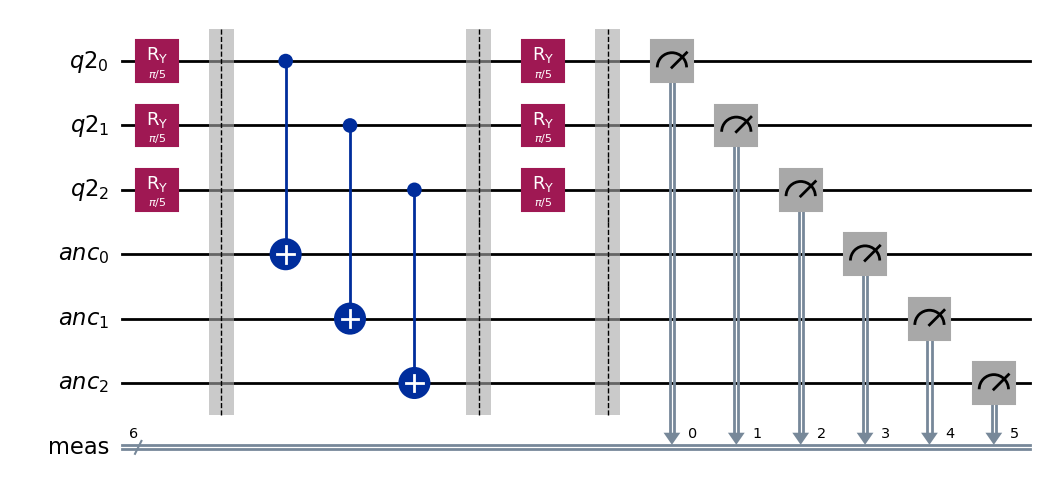

In [24]:
n_test = 3
n_anc = 3
pi = np.pi
theta = 0.2*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])
qct.cx(2,anc[2])


qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### 2.1.2. Brisbane's result

In [25]:
qc_transpiled = transpile(qct, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled], shots=2048*4)

#job_id = ''
service = QiskitRuntimeService()
job = service.job(job_id)
result3 = job.result()

In [26]:
sampler_result3 = result3[0]
data3 = sampler_result3.data
counts3 = data3.meas.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(counts3.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del counts3[k]
                break
            j+=1

    for k, v in list(counts3.items()):
        counts3[k[1:]] = counts3.pop(k)

In [27]:
df3 = pd.DataFrame(list(counts3.items()), columns=["States", "Counts"])
df3.to_excel("testBrisbane_3q_Ry_smaller_theta_data.xlsx", index=False)
experiment = pd.read_excel("testBrisbane_3q_Ry_smaller_theta_data.xlsx", dtype={"States": str})
counts3 = dict(zip(experiment["States"], experiment["Counts"]))

### 2.1.3. Simulation's result

In [28]:
simulation = pd.read_excel("testsim_3q_Ry_smaller_theta_data.xlsx", dtype={"States": str})
simu_counts3 = dict(zip(simulation["States"], simulation["Counts"]))

### 2.1.4. Comparison

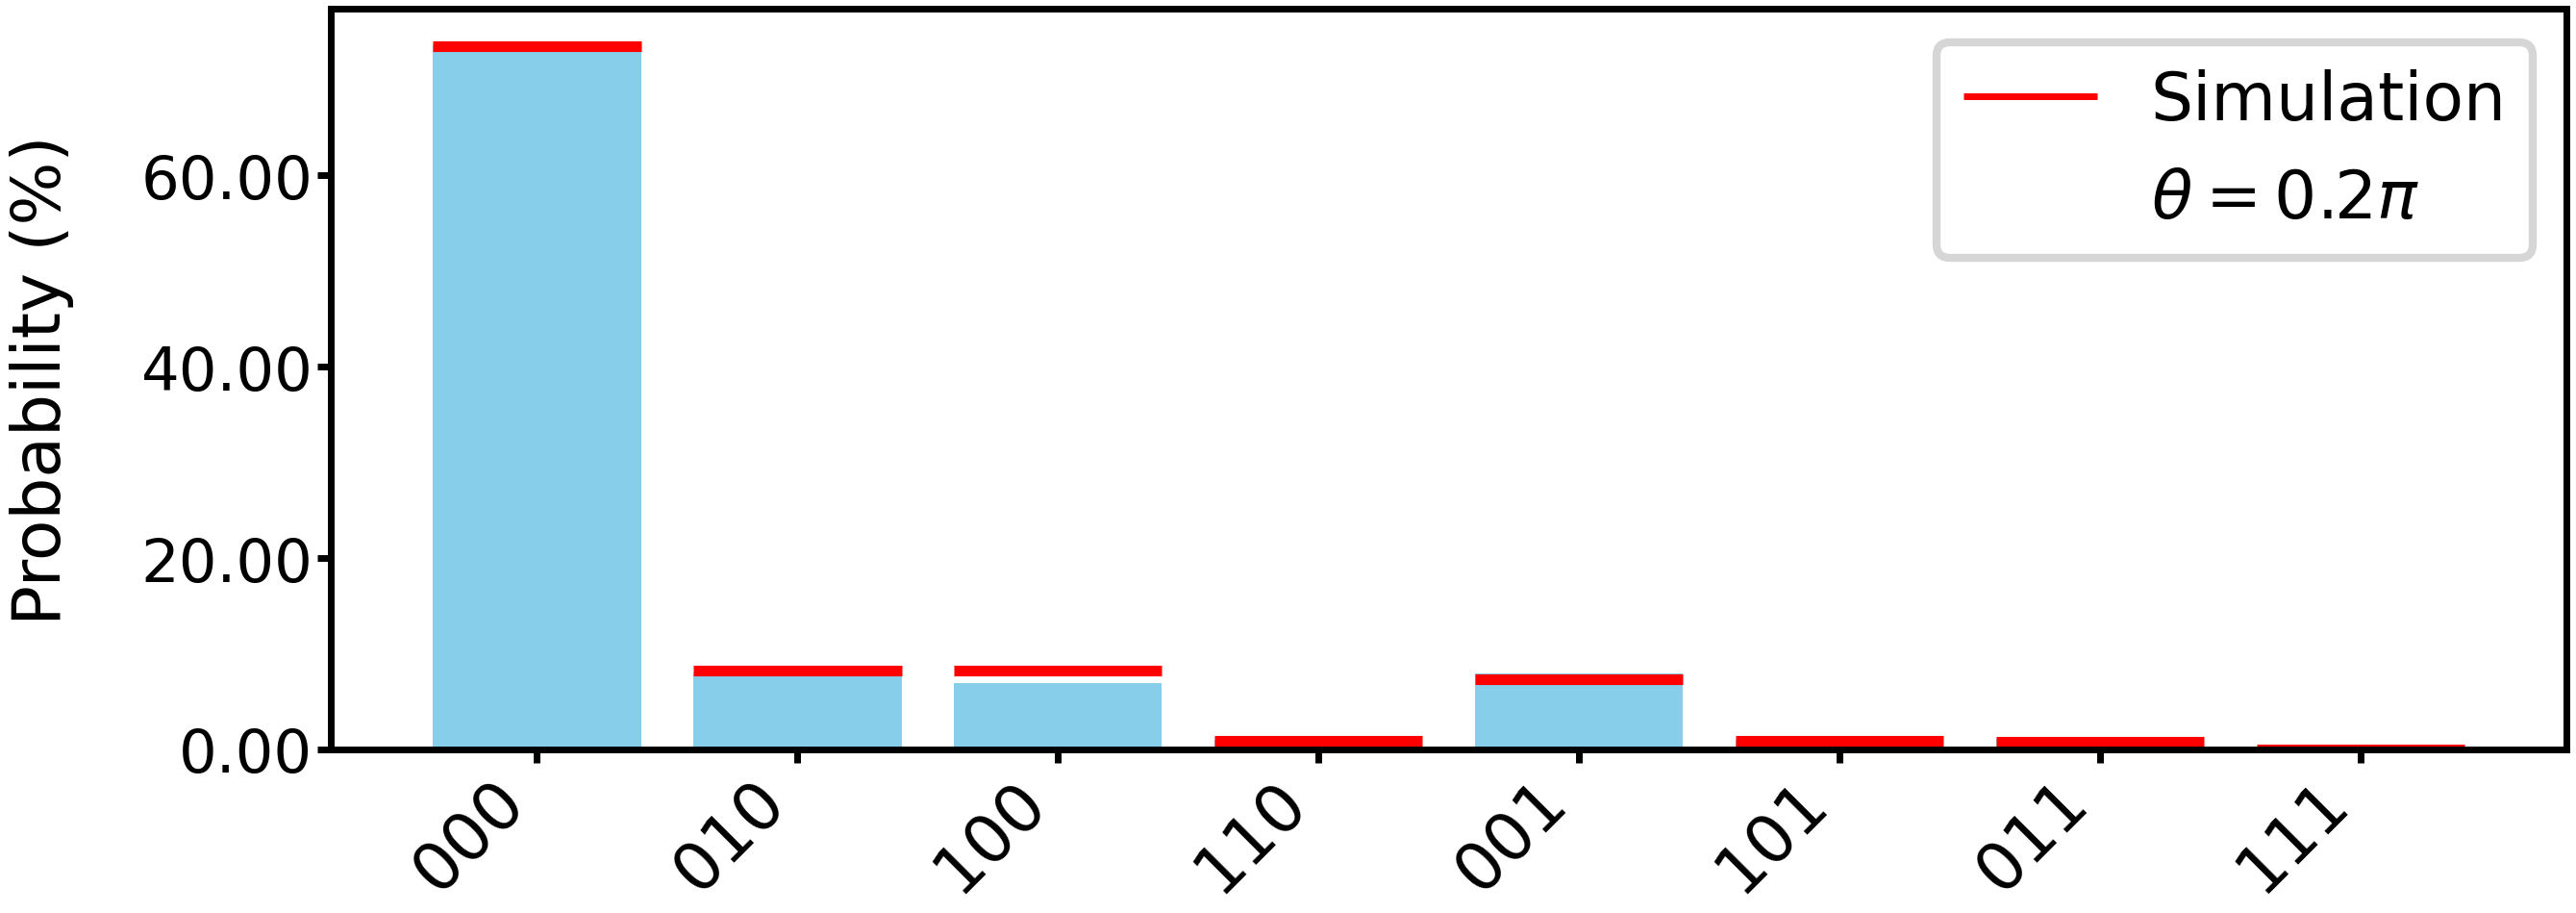

In [31]:
total_count = sum(counts3.values())
total_simu_counts = sum(simu_counts3.values())

probabilities = {state: count / total_count for state, count in counts3.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts3.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(30, 10))
bars = plt.bar(states, prob_values, color='skyblue')

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0005
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=8)

plt.hlines([], [], [], colors='red', linewidth=5, label='Simulation')

plt.plot([], [], ' ', label=r'$\theta = 0.2\pi$')
    
def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=45)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=50, labelpad=50)
plt.legend(fontsize=50, loc='upper right').get_frame().set_linewidth(6)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(5)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(5)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(5)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(5)
ax.tick_params(axis='x', length=10, width=5, direction='out')
ax.tick_params(axis='y', length=10, width=5, direction='out')
plt.show()

## 2.2. $\theta=0.45\pi$ (rad)
### 2.2.1. Circuit

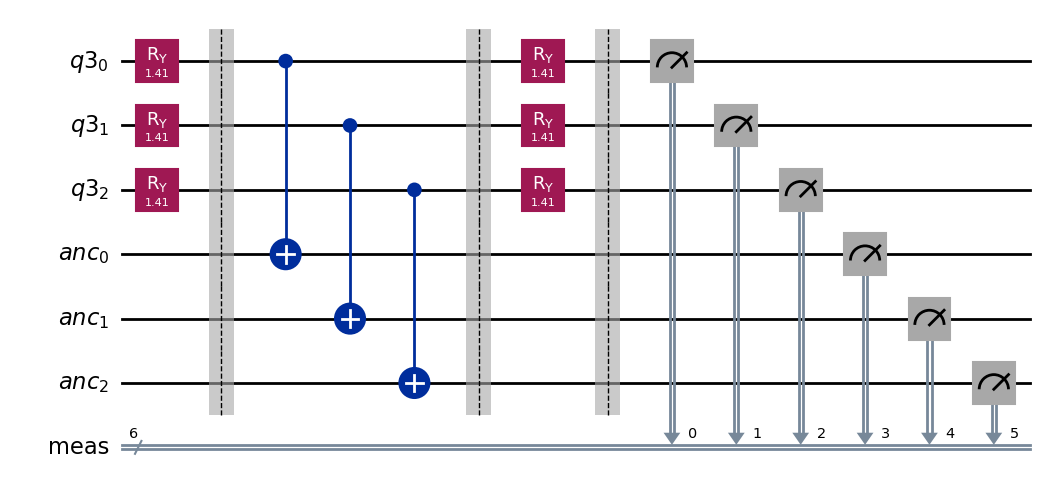

In [32]:
n_test = 3
n_anc = 3
pi = np.pi
theta = 0.45*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.cx(0,anc[0])
qct.cx(1,anc[1])
qct.cx(2,anc[2])


qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### 2.2.2. Brisbane's result

In [33]:
qc_transpiled = transpile(qct, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled], shots=2048*4)

#job_id = ''
service = QiskitRuntimeService()
job = service.job(job_id)
result4 = job.result()

In [34]:
sampler_result4 = result4[0]
data4 = sampler_result4.data
counts4 = data4.meas.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(counts4.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del counts4[k]
                break
            j+=1

    for k, v in list(counts4.items()):
        counts4[k[1:]] = counts4.pop(k)

In [35]:
df4 = pd.DataFrame(list(counts4.items()), columns=["States", "Counts"])
df4.to_excel("testBrisbane_3q_Ry_data.xlsx", index=False)
experiment = pd.read_excel("testBrisbane_3q_Ry_data.xlsx", dtype={"States": str})
counts4 = dict(zip(experiment["States"], experiment["Counts"]))

### 2.2.3. Simulation's result

In [36]:
simulation = pd.read_excel("testsim_3q_Ry_data.xlsx", dtype={"States": str})
simu_counts4 = dict(zip(simulation["States"], simulation["Counts"]))

### 2.2.4. Comparison

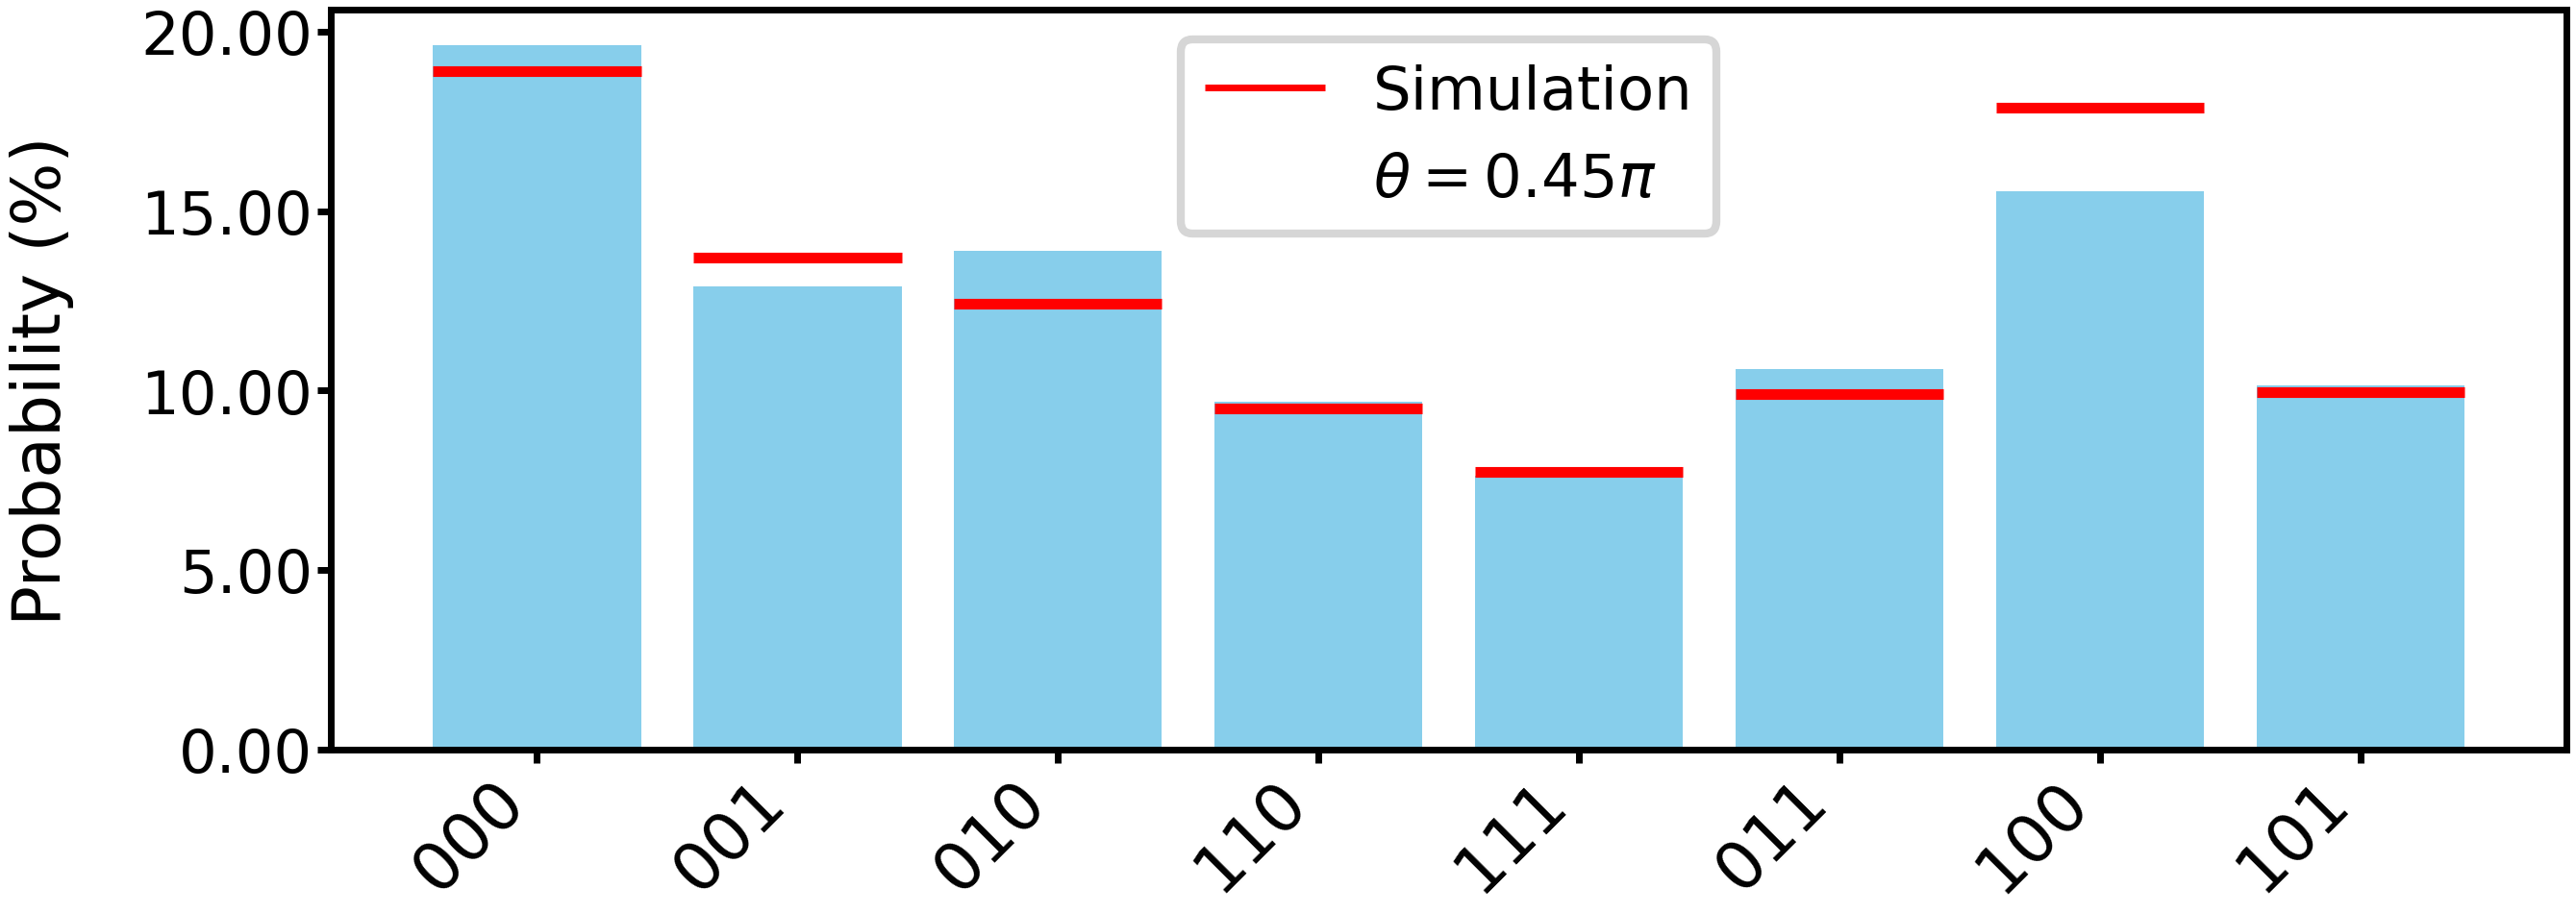

In [39]:
total_count = sum(counts4.values())
total_simu_counts = sum(simu_counts4.values())

probabilities = {state: count / total_count for state, count in counts4.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts4.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(30, 10))
bars = plt.bar(states, prob_values, color='skyblue')

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0005
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=8)

plt.hlines([], [], [], colors='red', linewidth=5, label='Simulation')

plt.plot([], [], ' ', label=r'$\theta = 0.45\pi$')
    
def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=45)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=50, labelpad=50)
plt.legend(fontsize=45, loc='upper center').get_frame().set_linewidth(6)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(5)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(5)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(5)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(5)
ax.tick_params(axis='x', length=10, width=5, direction='out')
ax.tick_params(axis='y', length=10, width=5, direction='out')
plt.show()

- The comparisons in 2.1.4 and 2.2.4 show that the deviations between Brisbane and simulation results are still small, especially when $\theta=0.2\pi$, the deivations are nearly negligible.
- Increasing $\theta$ leads to larger discrepancies, as shown in 2.2.4, the discrepancies are now more visible.
- However, the maximum deviation still stays below 3%, which is still acceptable.
- Therefore, $\theta$ value is alo unlikely to be the main causes of significant deviations, but it can exacerbate these deviations.

# 3. Verify the impact of the number of control qubits and the shared control qubits between Toffoli gates on the deviations
- Two circuits are used in this part.
- Each circuit consists of three qubits, with two $R_y(\theta=0.45\pi)$ gates apllied to each.
- In the first circuit, the three qubits control only one ancilla qubit. This circuit is designed to verify the impact of the number of control qubits on the deviations.
- In the second circuit, two neighbouring qubits forming a pair control a seperate ancilla. This circuit is intended to verify the influence of the shared control qubits among Toffoli gates to the deviations.
## 3.1. Three control qubits - one target
### 3.1.1. Circuit

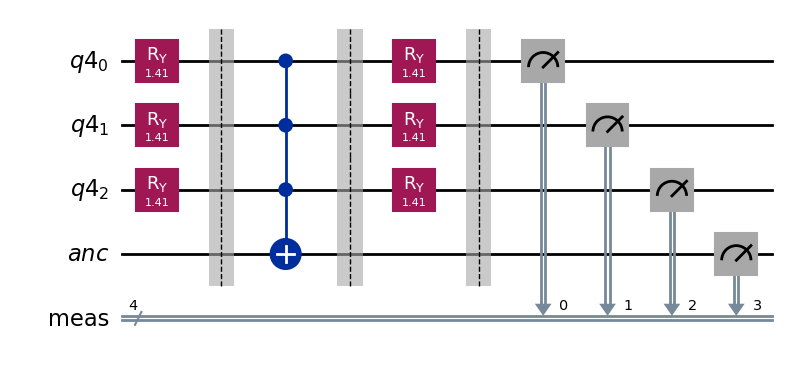

In [40]:
n_test = 3
n_anc = 1
pi = np.pi
theta = 0.45*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.mcx([0,1,2],anc)

qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### 3.1.2. Brisbane's result

In [41]:
qc_transpiled = transpile(qct, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled], shots=2048*4)

#job_id = ''
service = QiskitRuntimeService()
job = service.job(job_id)
result5 = job.result()

In [42]:
sampler_result5 = result5[0]
data5 = sampler_result5.data
counts5 = data5.meas.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(counts5.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del counts5[k]
                break
            j+=1

    for k, v in list(counts5.items()):
        counts5[k[1:]] = counts5.pop(k)

In [44]:
df5 = pd.DataFrame(list(counts5.items()), columns=["States", "Counts"])
df5.to_excel("testBrisbane_3q_3control_1target_Ry_data.xlsx", index=False)
experiment = pd.read_excel("testBrisbane_3q_3control_1target_Ry_data.xlsx", dtype={"States": str})
counts5 = dict(zip(experiment["States"], experiment["Counts"]))

### 3.1.3. Simulation's result

In [45]:
simulation = pd.read_excel("testsim_3q_3control_1target_Ry_data.xlsx", dtype={"States": str})
simu_counts5 = dict(zip(simulation["States"], simulation["Counts"]))

### 3.1.4. Comparison

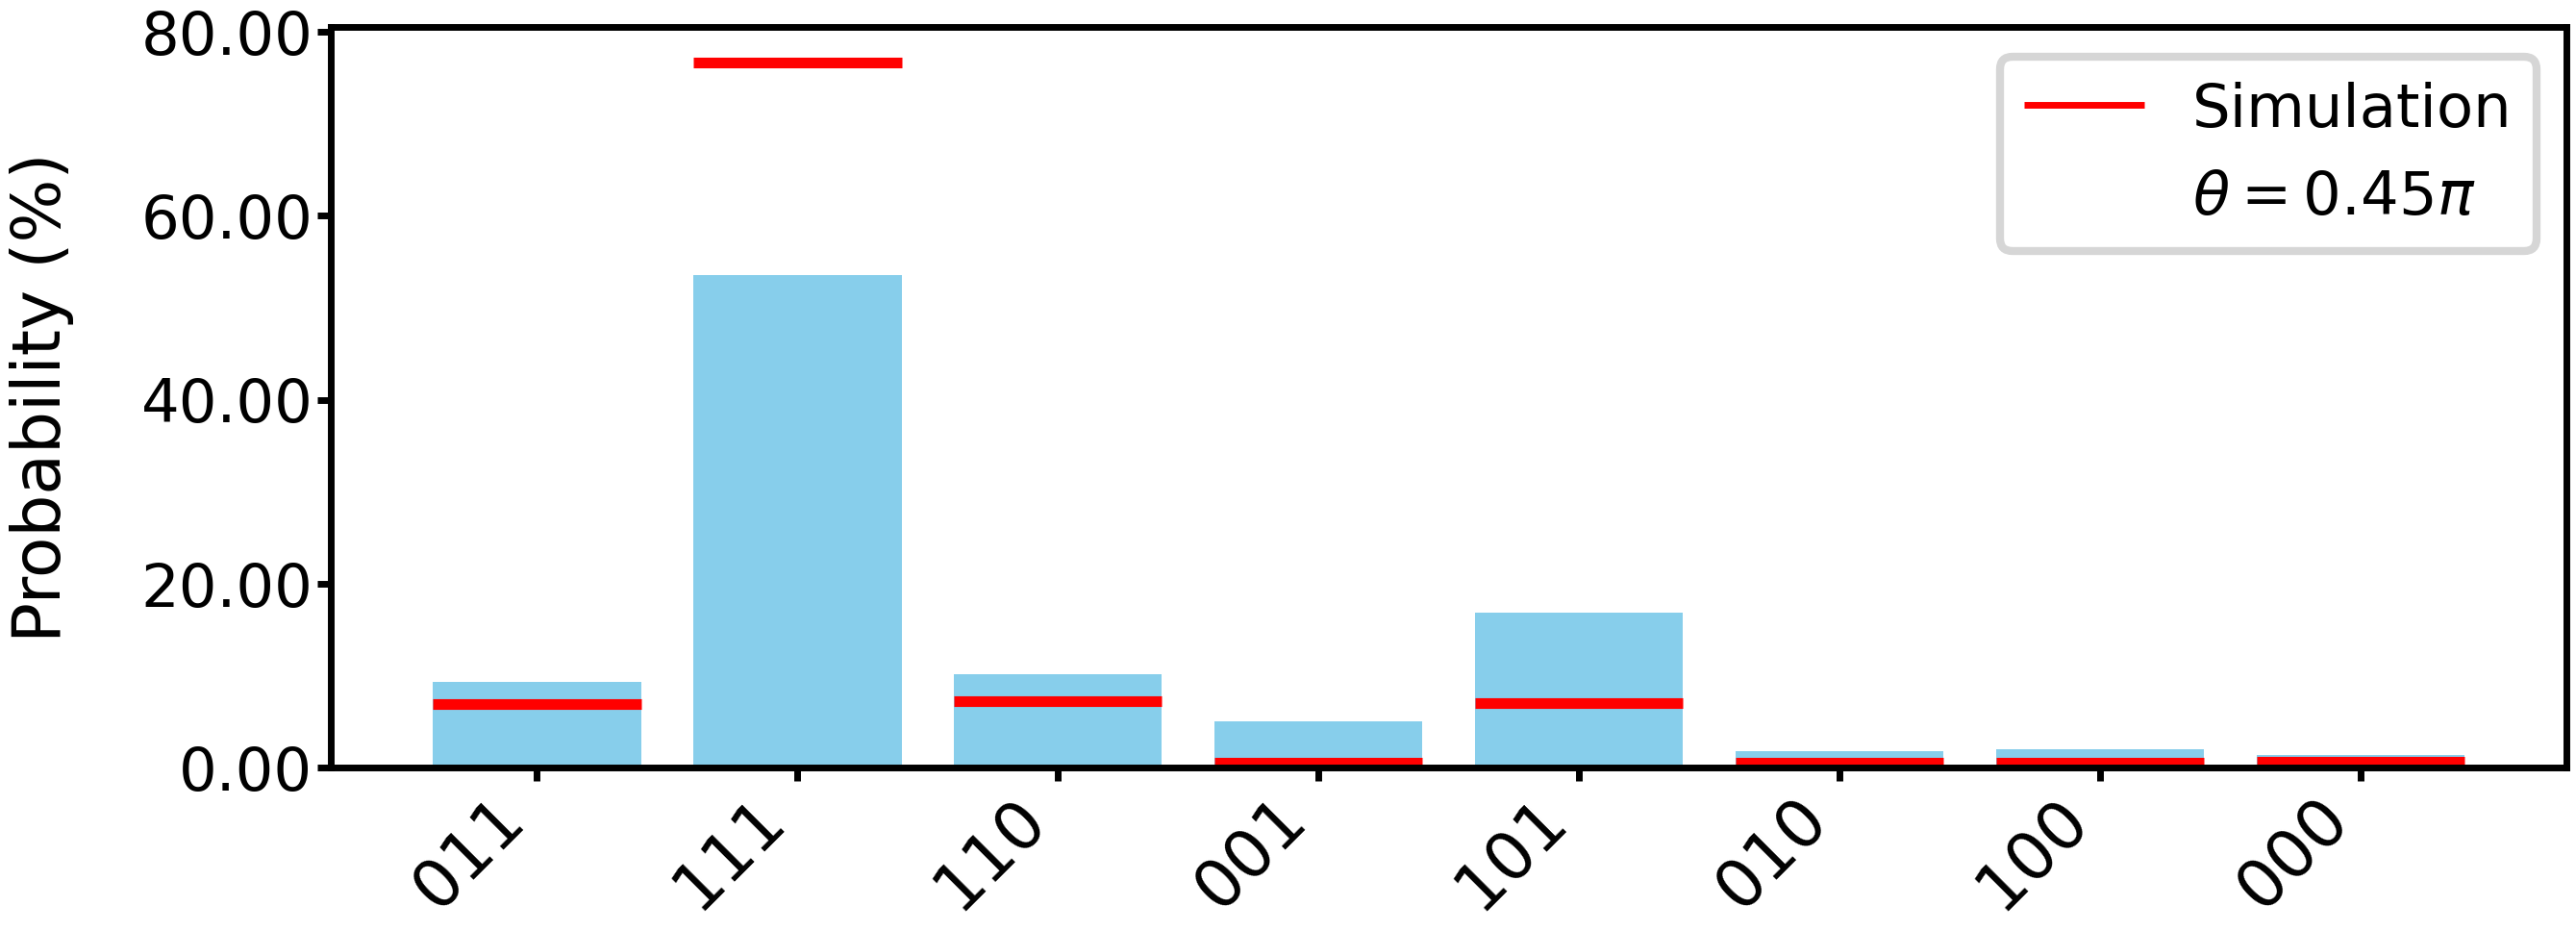

In [46]:
total_count = sum(counts5.values())
total_simu_counts = sum(simu_counts5.values())

probabilities = {state: count / total_count for state, count in counts5.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts5.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(30, 10))
bars = plt.bar(states, prob_values, color='skyblue')

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0005
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=8)

plt.hlines([], [], [], colors='red', linewidth=5, label='Simulation')

plt.plot([], [], ' ', label=r'$\theta = 0.45\pi$')
    
def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=45)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=50, labelpad=50)
plt.legend(fontsize=45, loc='upper right').get_frame().set_linewidth(6)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(5)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(5)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(5)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(5)
ax.tick_params(axis='x', length=10, width=5, direction='out')
ax.tick_params(axis='y', length=10, width=5, direction='out')
plt.show()

## 3.2. Three pairs of control qubits - Three targets - Shared control qubits exist
###  3.2.1 Circuit

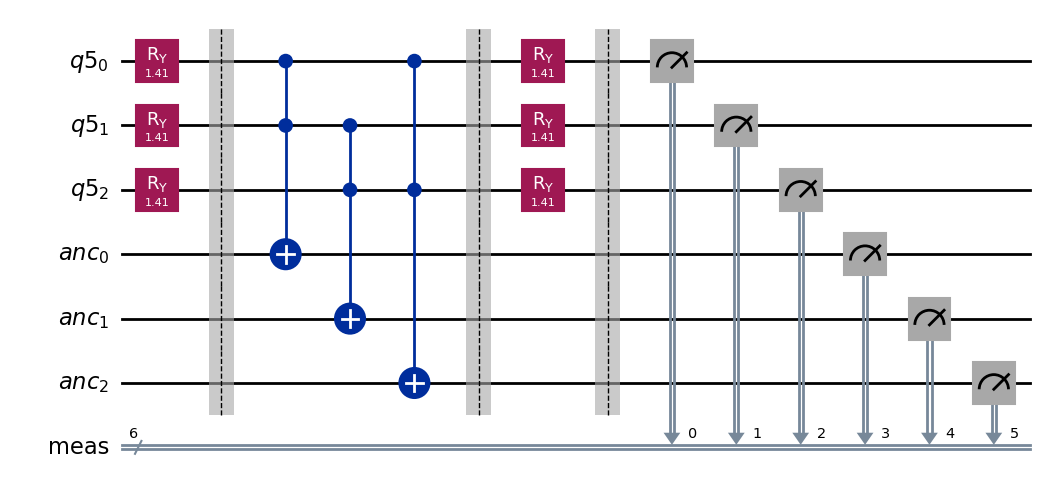

In [47]:
n_test = 3
n_anc = 3
pi = np.pi
theta = 0.45*pi

q = QuantumRegister(n_test)
anc = QuantumRegister(n_anc, name="anc")
qct = QuantumCircuit(q,anc)

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.barrier()

qct.ccx(0,1,anc[0])
qct.ccx(1,2,anc[1])
qct.ccx(0,2,anc[2])

qct.barrier()

qct.ry(theta,0)
qct.ry(theta,1)
qct.ry(theta,2)

qct.measure_all()
qct.draw(output='mpl')

### 3.2.2. Brisbane's result

In [48]:
qc_transpiled = transpile(qct, backend=backend)
sampler = Sampler(mode=backend)
job = sampler.run([qc_transpiled], shots=2048*4)

#job_id = ''
service = QiskitRuntimeService()
job = service.job(job_id)
result6 = job.result()

In [49]:
sampler_result6 = result6[0]
data6 = sampler_result6.data
counts6 = data6.meas.get_counts()

d = 0
for n in range (n_anc):
    for k, v in list(counts6.items()):
        j = 0
        for p in range (1):
            if len(k) > 0 and k[0] == '1':
                d += v
                del counts6[k]
                break
            j+=1

    for k, v in list(counts6.items()):
        counts6[k[1:]] = counts6.pop(k)

In [50]:
df6 = pd.DataFrame(list(counts6.items()), columns=["States", "Counts"])
df6.to_excel("testBrisbane_3q_3control_3target_Ry_data.xlsx", index=False)
experiment = pd.read_excel("testBrisbane_3q_3control_3target_Ry_data.xlsx", dtype={"States": str})
counts6 = dict(zip(experiment["States"], experiment["Counts"]))

### 3.2.3. Simulation's result

In [51]:
simulation = pd.read_excel("testsim_3q_3control_3target_Ry_data.xlsx", dtype={"States": str})
simu_counts6 = dict(zip(simulation["States"], simulation["Counts"]))

### 3.2.4. Comparison

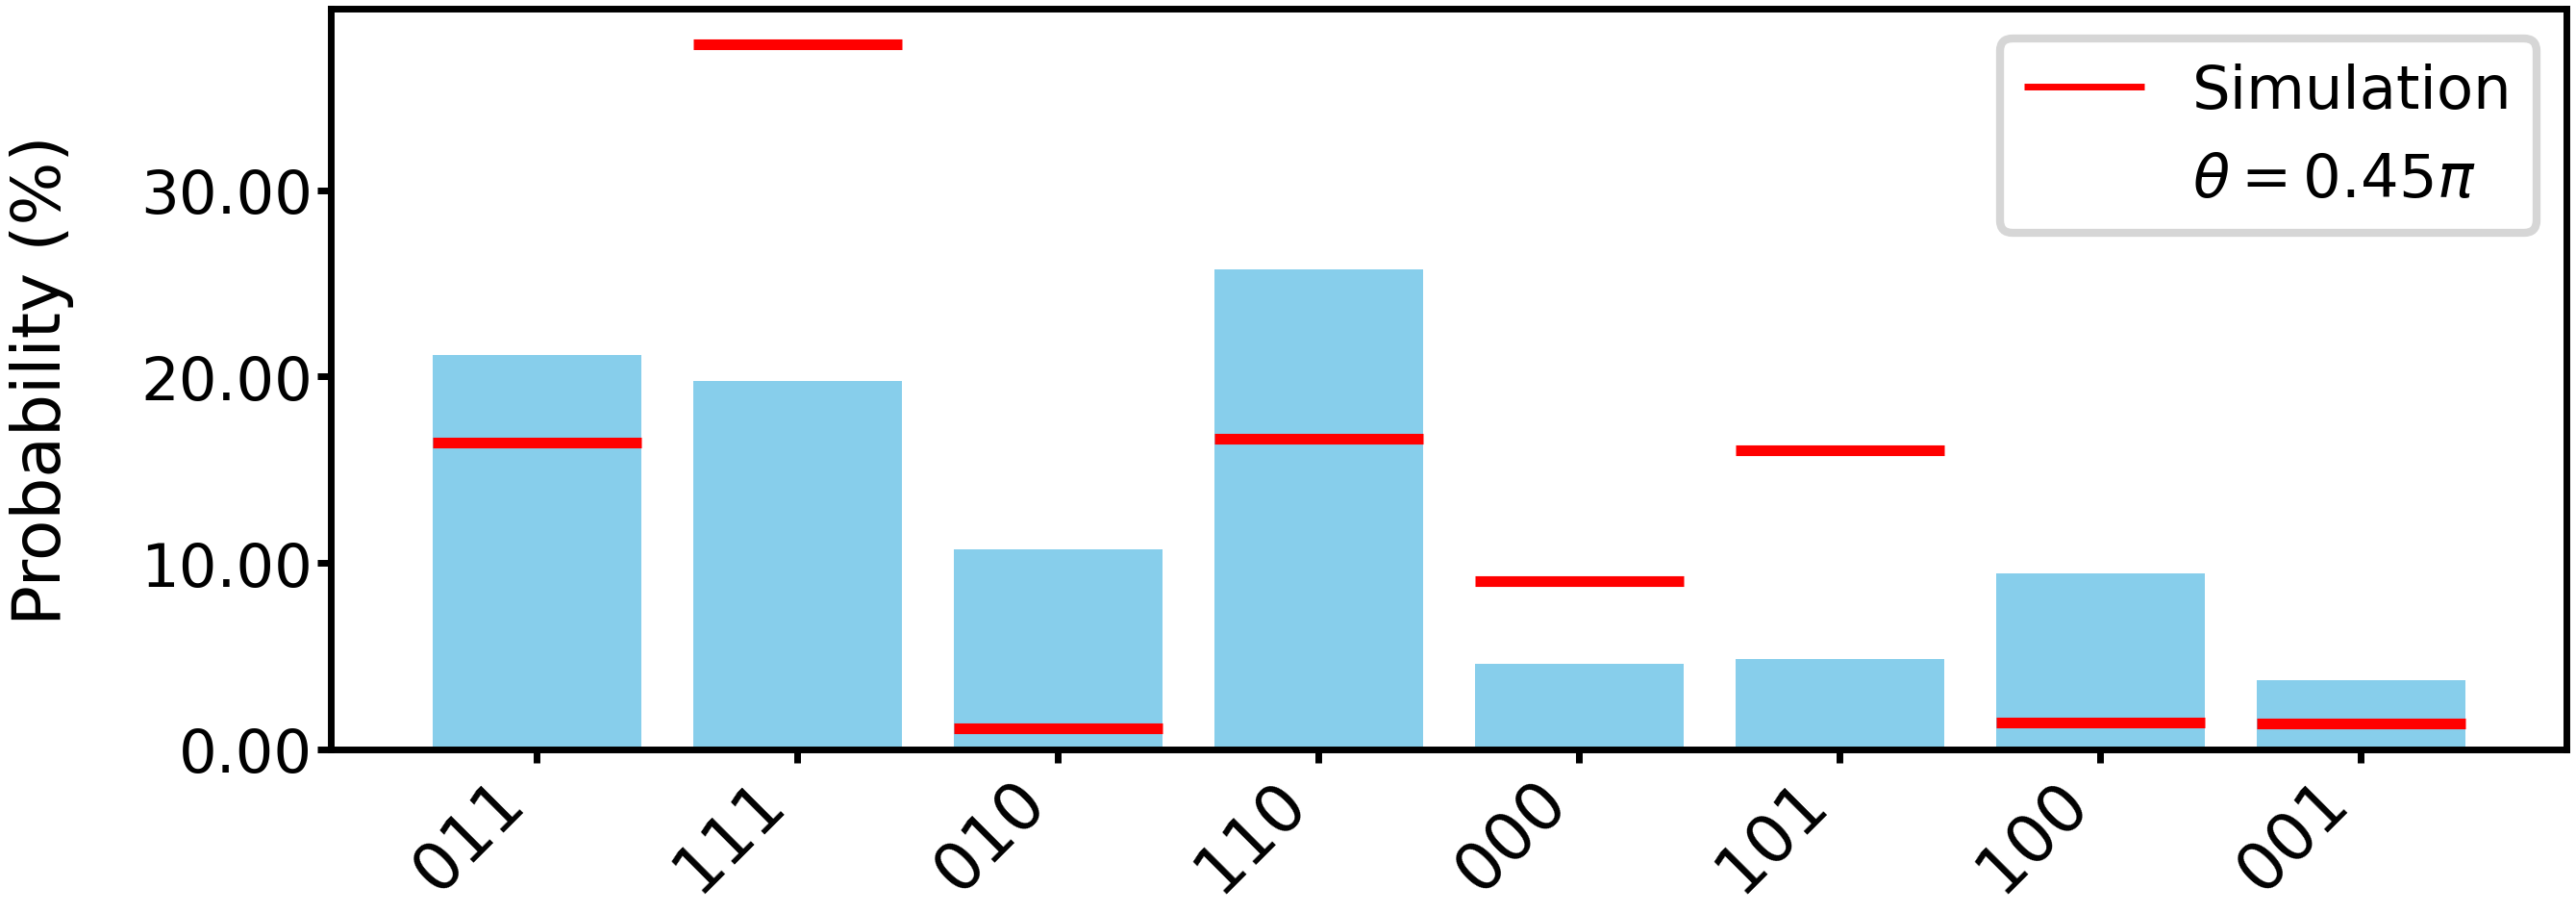

In [52]:
total_count = sum(counts6.values())
total_simu_counts = sum(simu_counts6.values())

probabilities = {state: count / total_count for state, count in counts6.items()}

states = list(probabilities.keys())  
prob_values = list(probabilities.values())

simu_probabilities = {state: count / total_simu_counts for state, count in simu_counts6.items()}

simu_states = list(simu_probabilities.keys())  
simu_prob_values = list(simu_probabilities.values())

plt.figure(figsize=(30, 10))
bars = plt.bar(states, prob_values, color='skyblue')

for simu_states, simu_prob_values in simu_probabilities.items():
    display_value = simu_prob_values if simu_prob_values > 0 else 0.0005
    plt.hlines(display_value, states.index(simu_states) - 0.4, states.index(simu_states) + 0.4, colors='red', linewidth=8)

plt.hlines([], [], [], colors='red', linewidth=5, label='Simulation')

plt.plot([], [], ' ', label=r'$\theta = 0.45\pi$')
    
def to_percent(y, _):
    return f'{y * 100:.2f}'

plt.gca().yaxis.set_major_formatter(FuncFormatter(to_percent))

plt.tick_params(axis='x', labelsize=50)
plt.tick_params(axis='y', labelsize=45)
plt.xticks(rotation=45, ha='right')
plt.ylabel("Probability (%)", fontsize=50, labelpad=50)
plt.legend(fontsize=45, loc='upper right').get_frame().set_linewidth(6)

ax = plt.gca()
ax.spines['bottom'].set_color('black')  
ax.spines['bottom'].set_linewidth(5)    
ax.spines['left'].set_color('black')    
ax.spines['left'].set_linewidth(5)
ax.spines['top'].set_color('black')  
ax.spines['top'].set_linewidth(5)    
ax.spines['right'].set_color('black')    
ax.spines['right'].set_linewidth(5)
ax.tick_params(axis='x', length=10, width=5, direction='out')
ax.tick_params(axis='y', length=10, width=5, direction='out')
plt.show()

- The comparisons in 3.1.4 and 3.2.4 show that the deviations start to be considerably large when having multiple control qubits and existing shared control qubits among Toffoli gates.
- The largest difference can reach approximately 20%.
- In contrast, the circuits examined in previous parts consist of multiple Toffoli gates but do not exhibit such considerable discrepancies.
- It suggests that the number of control qubits in a Toffoli gate, along with the presence of overlapping control qubits among Toffoli gates, are likely the primary causes for significant deviations between Brisbane and simulation.
- Furthermore, the $\theta$ value may not be the major factor but it can amplify the deviations.